In [6]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns
import scipy.stats as stats
import yfinance as yf

symbol = '^N225'
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
df = ticker.history(period='1y', interval='1wk')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-29 00:00:00+09:00,35814.289062,36441.089844,35704.578125,36158.019531,527400000,0.0,0.0
2024-02-05 00:00:00+09:00,36419.339844,37287.261719,35854.628906,36897.421875,689500000,0.0,0.0
2024-02-12 00:00:00+09:00,37248.359375,38865.058594,37184.101562,38487.238281,542500000,0.0,0.0
2024-02-19 00:00:00+09:00,38473.410156,39156.968750,38095.148438,39098.679688,438100000,0.0,0.0
2024-02-26 00:00:00+09:00,39320.640625,39990.230469,38876.808594,39910.820312,653500000,0.0,0.0
2024-03-04 00:00:00+09:00,40201.761719,40472.109375,39518.398438,39688.941406,628000000,0.0,0.0
2024-03-11 00:00:00+09:00,39232.140625,39241.281250,38271.378906,38707.640625,629400000,0.0,0.0
2024-03-18 00:00:00+09:00,38960.988281,41087.750000,38935.468750,40888.429688,556700000,0.0,0.0
2024-03-25 00:00:00+09:00,40798.960938,40979.359375,40054.058594,40369.441406,581800000,0.0,0.0


In [7]:
df0 = ticker.history(period='5y', interval='1wk')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-27 00:00:00+09:00,23309.320312,23421.589844,22892.949219,23205.179688,199900000,0.0,0.0
2020-02-03 00:00:00+09:00,22874.269531,23995.369141,22775.919922,23827.980469,371200000,0.0,0.0
2020-02-10 00:00:00+09:00,23631.789062,23908.849609,23603.480469,23687.589844,264700000,0.0,0.0
2020-02-17 00:00:00+09:00,23489.779297,23806.560547,23133.599609,23386.740234,300500000,0.0,0.0
2020-02-24 00:00:00+09:00,22949.369141,22950.230469,20916.400391,21142.960938,459800000,0.0,0.0
...,...,...,...,...,...,...,...
2024-12-30 00:00:00+09:00,40325.781250,40325.781250,39864.460938,39894.539062,110600000,0.0,0.0
2025-01-06 00:00:00+09:00,39945.421875,40288.800781,39166.050781,39190.398438,613900000,0.0,0.0
2025-01-13 00:00:00+09:00,39010.960938,39054.351562,38055.679688,38451.460938,457100000,0.0,0.0


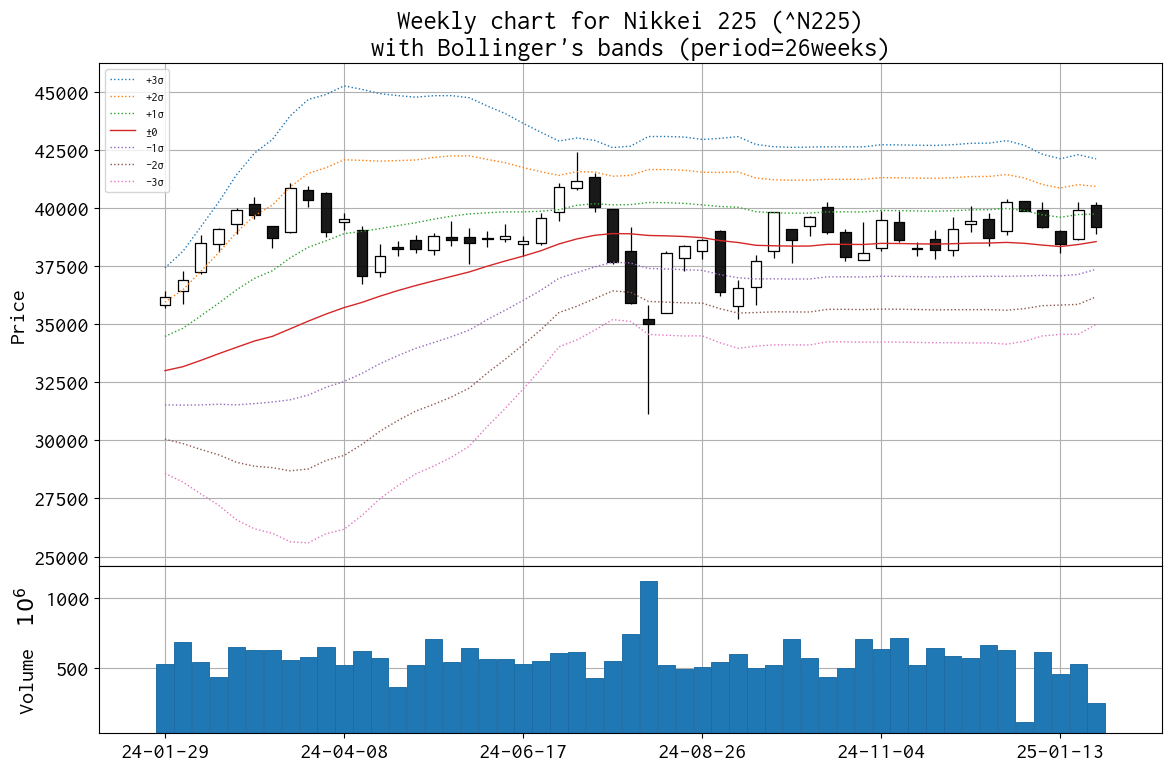

In [8]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 8))
ax = dict()
n = 2
gs = fig.add_gridspec(
    n, 1,
    wspace=0.0, hspace=0.0,
    height_ratios=[3 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex='col')):
    ax[i] = axis
    ax[i].grid()

# Bollinger bands
period = 26
r = df0['Close'].rolling(period)    
band_upper3 = r.mean() + 3 * r.std()
band_upper2 = r.mean() + 2 * r.std()
band_upper1 = r.mean() + 1 * r.std()
band_mean = r.mean()
band_lower1 = r.mean() - 1 * r.std()
band_lower2 = r.mean() - 2 * r.std()
band_lower3 = r.mean() - 3 * r.std()

apds  = [
    mpf.make_addplot(band_upper3[df.index], width=1, linestyle='dotted', label='+3σ', ax=ax[0]),
    mpf.make_addplot(band_upper2[df.index], width=1, linestyle='dotted', label='+2σ', ax=ax[0]),
    mpf.make_addplot(band_upper1[df.index], width=1, linestyle='dotted', label='+1σ', ax=ax[0]),
    mpf.make_addplot(band_mean[df.index], width=1, label='±0', ax=ax[0]),
    mpf.make_addplot(band_lower1[df.index], width=1, linestyle='dotted', label='-1σ', ax=ax[0]),
    mpf.make_addplot(band_lower2[df.index], width=1, linestyle='dotted', label='-2σ', ax=ax[0]),
    mpf.make_addplot(band_lower3[df.index], width=1, linestyle='dotted', label='-3σ', ax=ax[0]),
]   

mpf.plot(
    df, type='candle', style='default',
    addplot=apds,
    volume=ax[1],
    datetime_format='%y-%m-%d',
    xrotation=0,
    ax=ax[0],
)

try:
    ax[0].set_title('Weekly chart for %s (%s)\nwith Bollinger\'s bands (period=26weeks)' % (ticker.info['longName'], symbol))
except KeyError:
    ax[0].set_title('Weekly chart for %s\nwith Bollinger\'s bands (period=26weeks)' % symbol)

ax[0].legend(loc='best', fontsize=9)

plt.tight_layout()
plt.savefig('weekly_chart_bollinger_n225.png')
plt.show()

In [9]:
df.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-01-20 00:00:00+09:00,38671.769531,40279.789062,38643.839844,39931.980469,531000000,0.0,0.0
2025-01-27 00:00:00+09:00,40127.738281,40255.679688,38886.050781,39174.750000,249200000,0.0,0.0


In [10]:
df.tail(2)['Close']

Date
2025-01-20 00:00:00+09:00    39931.980469
2025-01-27 00:00:00+09:00    39174.750000
Name: Close, dtype: float64

In [11]:
df.tail(2)['Close'].diff()

Date
2025-01-20 00:00:00+09:00           NaN
2025-01-27 00:00:00+09:00   -757.230469
Name: Close, dtype: float64

In [12]:
df['Close'].tail(1) - df['Open'].tail(1)

Date
2025-01-27 00:00:00+09:00   -952.988281
dtype: float64

In [13]:
df['Close'].rolling(13).mean()

Date
2024-01-29 00:00:00+09:00             NaN
2024-02-05 00:00:00+09:00             NaN
2024-02-12 00:00:00+09:00             NaN
2024-02-19 00:00:00+09:00             NaN
2024-02-26 00:00:00+09:00             NaN
2024-03-04 00:00:00+09:00             NaN
2024-03-11 00:00:00+09:00             NaN
2024-03-18 00:00:00+09:00             NaN
2024-03-25 00:00:00+09:00             NaN
2024-04-01 00:00:00+09:00             NaN
2024-04-08 00:00:00+09:00             NaN
2024-04-15 00:00:00+09:00             NaN
2024-04-22 00:00:00+09:00    38748.105769
2024-04-29 00:00:00+09:00    38907.955829
2024-05-06 00:00:00+09:00    39010.393329
2024-05-13 00:00:00+09:00    39033.481070
2024-05-20 00:00:00+09:00    38998.667969
2024-05-27 00:00:00+09:00    38889.212440
2024-06-03 00:00:00+09:00    38811.903846
2024-06-10 00:00:00+09:00    38820.128305
2024-06-17 00:00:00+09:00    38643.823618
2024-06-24 00:00:00+09:00    38583.334135
2024-07-01 00:00:00+09:00    38731.048978
2024-07-08 00:00:00+09:00    

In [14]:
df['Close'].rolling(26).mean()

Date
2024-01-29 00:00:00+09:00             NaN
2024-02-05 00:00:00+09:00             NaN
2024-02-12 00:00:00+09:00             NaN
2024-02-19 00:00:00+09:00             NaN
2024-02-26 00:00:00+09:00             NaN
2024-03-04 00:00:00+09:00             NaN
2024-03-11 00:00:00+09:00             NaN
2024-03-18 00:00:00+09:00             NaN
2024-03-25 00:00:00+09:00             NaN
2024-04-01 00:00:00+09:00             NaN
2024-04-08 00:00:00+09:00             NaN
2024-04-15 00:00:00+09:00             NaN
2024-04-22 00:00:00+09:00             NaN
2024-04-29 00:00:00+09:00             NaN
2024-05-06 00:00:00+09:00             NaN
2024-05-13 00:00:00+09:00             NaN
2024-05-20 00:00:00+09:00             NaN
2024-05-27 00:00:00+09:00             NaN
2024-06-03 00:00:00+09:00             NaN
2024-06-10 00:00:00+09:00             NaN
2024-06-17 00:00:00+09:00             NaN
2024-06-24 00:00:00+09:00             NaN
2024-07-01 00:00:00+09:00             NaN
2024-07-08 00:00:00+09:00    

In [15]:
df['Close'].rolling(52).mean()

Date
2024-01-29 00:00:00+09:00             NaN
2024-02-05 00:00:00+09:00             NaN
2024-02-12 00:00:00+09:00             NaN
2024-02-19 00:00:00+09:00             NaN
2024-02-26 00:00:00+09:00             NaN
2024-03-04 00:00:00+09:00             NaN
2024-03-11 00:00:00+09:00             NaN
2024-03-18 00:00:00+09:00             NaN
2024-03-25 00:00:00+09:00             NaN
2024-04-01 00:00:00+09:00             NaN
2024-04-08 00:00:00+09:00             NaN
2024-04-15 00:00:00+09:00             NaN
2024-04-22 00:00:00+09:00             NaN
2024-04-29 00:00:00+09:00             NaN
2024-05-06 00:00:00+09:00             NaN
2024-05-13 00:00:00+09:00             NaN
2024-05-20 00:00:00+09:00             NaN
2024-05-27 00:00:00+09:00             NaN
2024-06-03 00:00:00+09:00             NaN
2024-06-10 00:00:00+09:00             NaN
2024-06-17 00:00:00+09:00             NaN
2024-06-24 00:00:00+09:00             NaN
2024-07-01 00:00:00+09:00             NaN
2024-07-08 00:00:00+09:00    

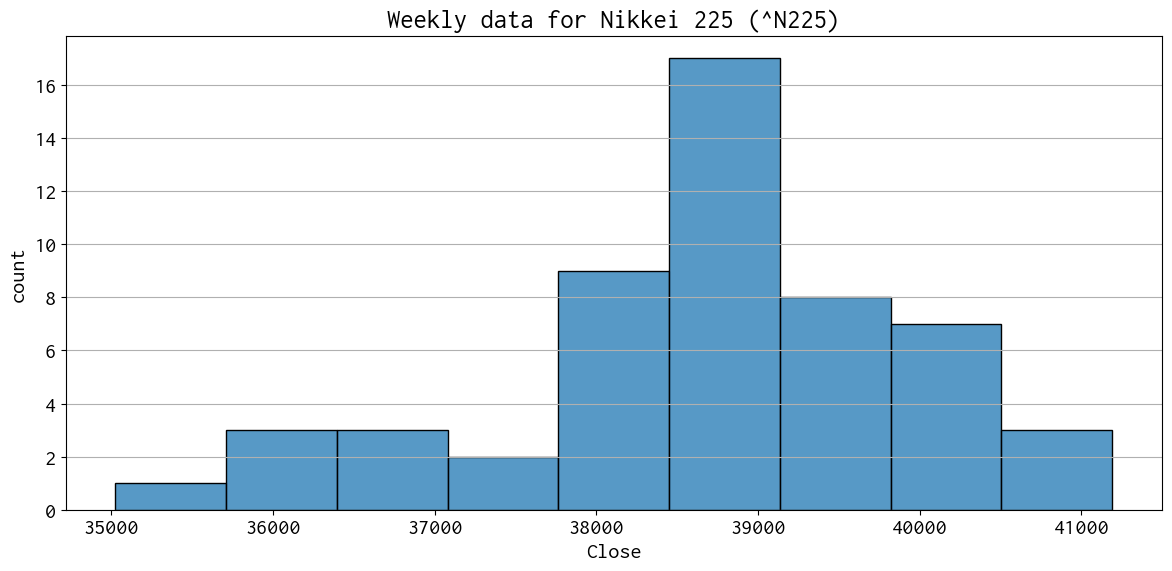

In [16]:
plt.rcParams['font.size'] = 16
fig = plt.figure(figsize=(12, 6))
#ax = fig.add_axes(111)
ax = fig.add_subplot(111)

ax = sns.histplot(
  data = df,
  x = "Close"
)
ax.set_xlabel("Close")
ax.set_ylabel("count")
ax.set_title('Weekly data for %s (%s)' % (ticker.info['longName'], symbol))
ax.grid(axis = 'y')

plt.tight_layout()
plt.savefig('weekly_histogram_n225.png')
plt.show()

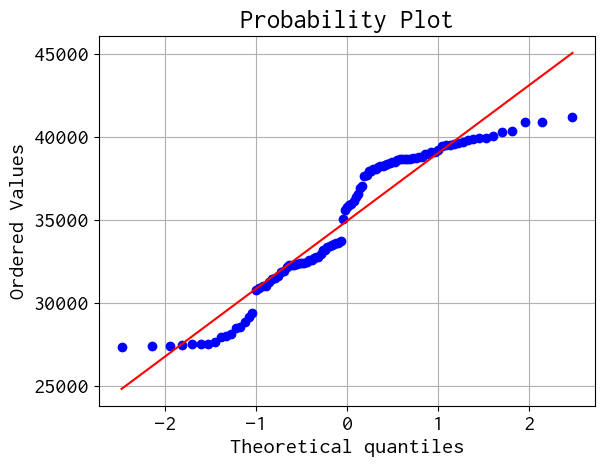

In [12]:
# Q-Qプロットの描画
stats.probplot(df['Close'], dist="norm", plot=plt)
plt.grid()
plt.show()

In [13]:
len(df)

105

In [14]:
W, shapiro_p_value = stats.shapiro(df['Close'])
print(f'Shapiro-Wilk test statistic: {W}, p-value: {shapiro_p_value}')

Shapiro-Wilk test statistic: 0.9119975716818348, p-value: 3.3672495383949503e-06
